# Image Bijective Graph


In [1]:
from pyMeasure.Code.DataHandlers.GraphModels import *
import PIL
import os
import re

Importing Code.Utils.Names
Importing Code.DataHandlers.NISTModels
Importing Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
Importing Code.DataHandlers.RadiCALModels
Importing Code.DataHandlers.ZipModels
Importing Code.DataHandlers.Translations
Importing Code.DataHandlers.StatistiCALModels
Importing Code.DataHandlers.MUFModels
Importing Code.Analysis.SParameter
Importing Code.InstrumentControl.Instruments
Importing Code.InstrumentControl.Experiments


In [2]:
im=PIL.Image.open('Rectangular_Graph_plot_20161130_001.png')

In [91]:
file_name='Rectangular_Graph_plot_20161130_001.png'
directory=os.getcwd()
def png_to_jpg(png_file_name):
    [root_name,extension]=png_file_name.split(".")
    jpeg_file_name=root_name+".jpg"
    PIL.Image.open(png_file_name).save(jpeg_file_name)
    return jpeg_file_name
def file_to_Image(file_path):
    new_image=PIL.Image.open(file_path)
    if re.search(".gif",file_path,re.IGNORECASE):
        new_image=new_image.convert("RGB")
    return new_image

def Image_to_file(pil_image,file_path=None):
    if file_path is None:
        file_path=pil_image.filename
    pil_image.save(file_path)
    return file_path

def Image_to_file_type(pil_image,file_path=None,extension="png"):
    
    if file_path is None:
        file_path=pil_image.filename
    root_name=file_path.split(".")[0]
    new_file_name=root_name+"."+extension.replace(".","")
    if re.search('jp|bmp',extension,re.IGNORECASE):
        pil_image.convert('RGB')
    print("{0} is {1}".format("pil_image.mode",pil_image.mode))
    pil_image.save(new_file_name)
    return new_file_name
    
def Image_to_thumbnail(pil_image,file_path="thumbnail.jpg"):
    size = (64, 64)
    temp_image=pil_image.copy()
    temp_image.thumbnail(size)
    temp_image.save(file_path)
    return file_path

def png_to_base64(file_name):
    in_file=open(file_name, "rb")
    encoded=base64.b64encode(in_file.read())
    return encoded

def base64_to_png(base64_encoded_png,file_name="test.png"):
    out_file=open(file_name, "wb")
    decoded=base64.b64decode(base64_encoded_png)
    out_file.write(decoded)
    out_file.close()
    return file_name
 
    
def png_to_ndarray(file_name):
    nd_array=misc.imread(file_name)
    return nd_array

def ndarray_to_png(nd_array,file_name="test.png"):
    misc.imsave(file_name,nd_array)
    return file_name

# change this to base64png
def base64png_to_embeded_html(base64_encoded_png):
    html_string="<img src='data:image/png;base64,{0}' />".format(base64_encoded_png)
    return html_string

def embeded_html_to_base64png(html_string):
    pattern=re.compile("<img src='data:image/png;base64,(?P<data>.+)' />")
    match=re.search(pattern,html_string)
    if match:
        encoded=match.groupdict()["data"]
    else:
        raise
    return encoded



In [15]:
"Image".split(".")

['Image']

In [4]:
png_to_jpg(os.path.join(directory,file_name))

'C:\\Users\\sandersa\\PyCharmProjects\\Jupyter-Notebooks\\Rectangular_Graph_plot_20161130_001.jpg'

In [14]:
im.filename

'Rectangular_Graph_plot_20161130_001.png'

In [92]:
graph_options={"graph_name":"Image Graph",
                  "node_names":['Image','png'],
                  "node_descriptions":["PIL Image","png"],
                  "current_node":'Image',
                  "state":[1,0],
                  "data":im,
                  "edge_2_to_1":file_to_Image,
                  "edge_1_to_2":lambda x: Image_to_file_type(x,file_path="test",extension="png")
                 }
image_graph=Graph(**graph_options)

In [23]:
image_graph.show()

In [93]:
image_graph.add_node("jpg","Image",lambda x: Image_to_file_type(x,file_path="test",extension="jpg"),
                     "Image",file_to_Image)
image_graph.add_node("tiff","Image",lambda x: Image_to_file_type(x,file_path="test",extension="tiff"),
                     "Image",file_to_Image)
image_graph.add_node("gif","Image",lambda x: Image_to_file_type(x,file_path="test",extension="gif"),
                     "Image",file_to_Image)
image_graph.add_node("bmp","Image",lambda x: Image_to_file_type(x,file_path="test",extension="bmp"),
                     "Image",file_to_Image)
image_graph.add_node("base64","png",png_to_base64,
                     "png",base64_to_png)
image_graph.add_node("embededHTML","base64",base64png_to_embeded_html,
                     "base64",embeded_html_to_base64png)
image_graph.add_node("ndarray","png",png_to_ndarray,
                     "png",ndarray_to_png)
image_graph.add_external_node("thumbnail","Image",Image_to_thumbnail)

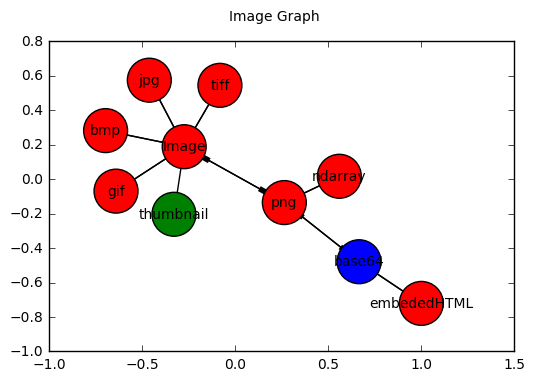

In [95]:
image_graph.show()

In [110]:
from ipywidgets import *
from IPython.display import Image,display,HTML
def move_and_show(node_name):
    image_graph.move_to_node(node_name)
    print("{0}".format(node_name))
    if node_name is "Image":
        print("PIL Image Class")
    elif node_name in ["png","jpg"]:
        display(Image(image_graph.data,embed=True))
    elif node_name in ["base64"]:
        display(HTML("<img src='data:image/png;base64,{0}' />".format(image_graph.data)))
    elif node_name in ["embeded_html"]:
        display(HTML(image_graph.data))
        print image_graph.data 
    elif node_name in ["ndarray"]:
        plt.imshow(image_graph.data)
        plt.show()
    else:
        display(HTML("<img src='{0}' />".format(image_graph.data)))
interact(move_and_show,node_name=image_graph.node_names)

['edge_tiff_Image_000', 'edge_Image_gif_000']
moving tiff -> Image
moving Image -> gif
pil_image.mode is RGB
gif


In [38]:
im.show()

In [9]:
image_graph.jump_to_external_node("thumbnail")

['edge_jpg_Image_000']
moving jpg -> Image


'thumbnail.jpg'

In [99]:
image_graph.show()

In [10]:
from scipy.io import savemat,loadmat
new_figure=loadmat("PropagationConstant.fig")

In [106]:
def fig_to_matplotlib(filename,fignr=1):
    "Function that uses loadmat to create a matplotlib plot of a matlab fig file"
    from scipy.io import loadmat
    from numpy import size
    from matplotlib.pyplot import plot,figure,hold,xlabel,ylabel,show,clf,xlim,legend
    d = loadmat(filename,squeeze_me=True, struct_as_record=False)
    ax1 = d['hgS_070000'].children
    if size(ax1) > 1:
        legs= ax1[1]
        ax1 = ax1[0]
    else:
        legs=0
    figure(fignr)
    clf()
    hold(True)
    counter = 0    
    for line in ax1.children:
        if line.type == 'graph2d.lineseries':
            if hasattr(line.properties,'Marker'):
                mark = "%s" % line.properties.Marker
                mark = mark[0]
            else:
                mark = '.'
            if hasattr(line.properties,'LineStyle'):
                linestyle = "%s" % line.properties.LineStyle
            else:
                linestyle = '-'
            if hasattr(line.properties,'Color'):
                r,g,b =  line.properties.Color
            else:
                r = 0
                g = 0
                b = 1
            if hasattr(line.properties,'MarkerSize'):
                marker_size = line.properties.MarkerSize
            else:
                marker_size = 1                
            x = line.properties.XData
            y = line.properties.YData
            plot(x,y,marker=mark,linestyle=linestyle,color=(r,g,b),markersize=marker_size)
        elif line.type == 'text':
            if counter <1:
                #print(dir(line.properties))
                counter += 1
            elif counter < 2:
                #print dir(line.properties.String)
                xlabel("%s" % line.properties.String,fontsize = 16)
                counter += 1 
            elif counter < 3:
                #print dir(line.properties.String)
                ylabel("%s" % line.properties.String,fontsize = 16)
                counter += 1 
    xlim(ax1.properties.XLim)
    if legs:        
        leg_entries = tuple(legs.properties.String)
        py_locs = ['upper center','lower center','right','left','upper right','upper left','lower right','lower left','best']
        MAT_locs=['North','South','East','West','NorthEast', 'NorthWest', 'SouthEast', 'SouthWest','Best']
        Mat2py = dict(zip(MAT_locs,py_locs))
        location = legs.properties.Location
        legend(leg_entries,loc=Mat2py[location])
    hold(False)
    show()

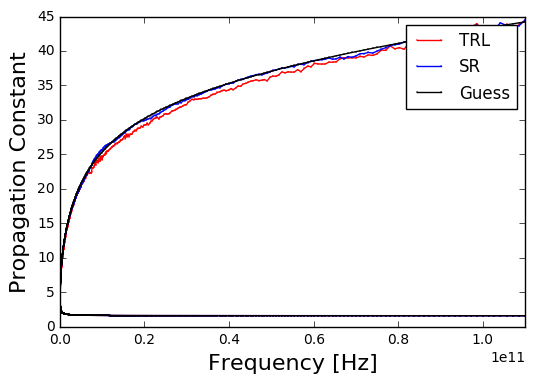

In [107]:
fig_to_matplotlib("PropagationConstant.fig")

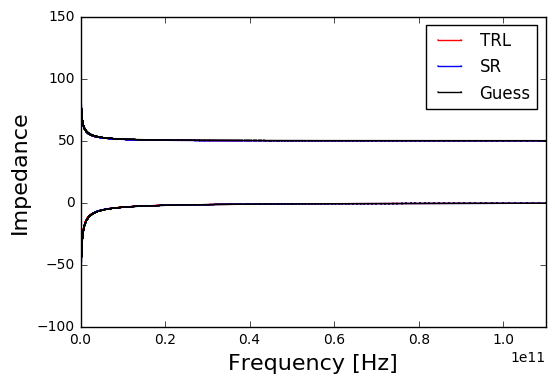

In [56]:
fig_to_matplotlib("CharacteristicImpedance.fig")

<img src="test.png" />


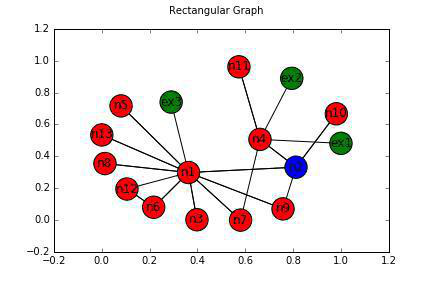

In [33]:
import base64
in_file=open("test.png", "rb")
encoded = base64.b64encode(in_file.read())
in_file.close()
display(HTML("<img src='data:image/png;base64,{0}' />".format(encoded)))

In [26]:
base64_to_png(encoded)

'test.png'

In [31]:
decoded= base64.b64decode(base64.b64encode(open("test.png", "rb").read()))

In [32]:
decoded==open("test.png", "rb").read()

True

In [44]:
out_file=open("test2.png","wb")

In [45]:
out_file.write(open("test.png", "rb").read())

In [46]:
out_file.close()

In [57]:
 from scipy import misc

In [58]:
image_array=misc.imread("test.png")

In [109]:
%matplotlib inline
from scipy import misc
misc.imshow(image_array)
plt.show(image_array)


RuntimeError: Could not execute image viewer.

In [102]:
plt.show()

In [90]:
def embeded_html_to_base64png(html_string):
    pattern=re.compile("<img src='data:image/png;base64,(?P<data>.+)' />")
    match=re.search(pattern,html_string)
    if match:
        encoded=match.groupdict()["data"]
    else:
        raise
    return encoded
html_string="<img src='data:image/png;base64,{0}' />".format(encoded)
embeded_html_to_base64png(html_string)

'iVBORw0KGgoAAAANSUhEUgAAAbAAAAEgCAIAAABaSrE+AAEAAElEQVR4nOydd5ydVZ3/P+c8/bn9zp1ekkx6QqgJRaQJiCAoFuxiWduqi64KFkBd1orrKohtUVQEARVFQEW6Ir2EUNLLJJk+c/t9+nPO+f1xJiPrCpr8EmZi7vs1DJM7d577fdr3+Z5vJUIINDnw4JwPDg729fUFQWAYRhAEqqoCUBTlb76/Wq1mMhkAlUolk8nEcRxFkW3be1EkxhghhFIqPyKKIl3Xn+/NnudZltVoNCzLkmL7vm8YBiFkdz+3XC5nMpmJiYn29nbP8+I4tm37+Y5Dk39u6EwL0GRmEEL09fUBqNfrjUbDMAxKKWPs+d5vWRZjzPM8qQ01TTMMI4qivSUPYywIAsdxgiCwbZsQ8sIqSVXVer1u27bruoqiMMbCMNwDbdhoNHK53OOPP97e3h4EgaIoqVQqDMP/j11psh9DmhbigYnneZRS13VzuRyAMAwrlUpbW9sL/wljLJlM1mq1dDothAjD0DCMvSJPHMfSRJVK2fM8RVGk9fcCVCqVbDYLQIoURZGmabv70ePj421tbdVqNZ1O+74vdfEebKfJPwFNhXiAIoSQpz4IAkKIYRiMMamSno8gCCilmqY1Gg1CiK7re1FrOI6jqmq1WuWcd3R0yBelmvub75fa2TAMTdOKxWJLS8v0on63cF03DMNqtVooFBRFMU0Tu1Tk/8/uNNlPaSrEA5dyuSzNwyiKgiDQNM33/efTKdJwUxQlDENd18MwVBRlLzrapCtTXo1xHIdhmEgkps3G/0upVMrn877va5oWBAEA27alY3EPPlf+7LqupmmKokRRtLcs3yb7F00f4gFKFEW5XG5kZAQAY2za2nqBP5FGJSEkDENVVaXnbm/Jo2kaY2x8fJwQIp2JURS9gMWaSqXkX5VKJdu2pR7cg6e7DCgFQVCv1w3D8DyvWCw2teEBS1MhHqDEcez7/iGHHLJ